<h1>1.读取认证信息和租户信息</h1>
认证信息不需要在每次调用接口时都去通过登录重新获取，认证信息的有效时间是7天，因此在7天内都可以重复使用，可以直接读取user_info.json中保存的认证信息。

In [ ]:
import json

with open('user_info.json', 'r', encoding='utf-8') as f:
    payload = json.load(f)

token=payload["token"]
tenantId=payload["tenantId"]
print("认证信息：",token)
print("租户信息：",tenantId)

## 智能反硝化碳源加药
- 获取加药参数

In [ ]:
#污水业务中台领域服务
from dhicn_wwtp_data_bus_service import *

# 设置服务地址 & 必要的认证信息
configuration=Configuration.get_default_copy()
configuration.host="https://online-products.dhichina.cn/gateway/wwtp-paas-main-bus-service"
api_client=ApiClient(configuration)
api_client.set_default_header('Authorization',token)
api_client.set_default_header('tenantId',tenantId)

# 构建参数
param={
'category':1,
'production_line_code':'1A'
}

#调用接口
intelligent_deni_instance=IntelligentDenitrificationApi(api_client)
response=intelligent_deni_instance.api_intelligent_denitrification_get_dosing_parameter_get(**param)

print(response)


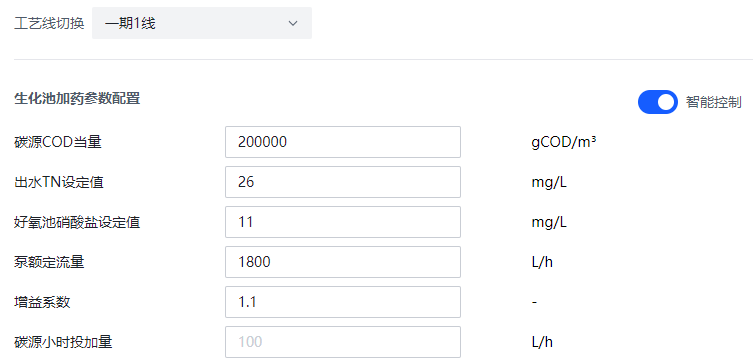